## Final Notebook

Please fill out:
* Student name: Andrew Levinton
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Ahbineet Kulkarni
* Blog post URL:


## Statsmodels debug
- This is because statsmodels was having version issues. this is a workaround
- The code below re-publishes the existing (but private) _centered function as a public attribute to the module already imported in RAM.

In [287]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

## Import necessary libraries

In [419]:
# raw data handling
import pandas as pd
import numpy as np
import datetime as dt

# data visualiztion
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# regression modeling
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error


import warnings # weird sns.distplot() warnings
warnings.filterwarnings("ignore")



plt.style.use('ggplot')

## Define Functions

In [420]:
# Grabbing vifs
def get_vifs(data):
    # Get a list of the column names
    cols = data.columns

    # Create an empty DataFrame to hold the VIF results
    vif_data = pd.DataFrame()

    # Loop through each column and calculate the VIF
    for i in range(len(cols)):
        vif = variance_inflation_factor(data[cols].values, i)
        vif_data = vif_data.append({'Variable': cols[i], 'VIF': vif}, ignore_index=True)

    # Print the VIF results
    return print(vif_data)


# get ols model and plot residual distribution
def get_OLS_model(name, X, y):
    model = sm.OLS(y, sm.add_constant(X))
    results = model.fit()
    model_residual = results.resid
    
    return print(results.summary()), plt.suptitle(f'Residual distribution for {name} model'), sns.distplot(model_residual), plt.show()



#get qq and histogram plots 
def plot_hist_qq(df, target_col):
    """
    Creates a histogram and QQ-plot for a given dataframe and target column.

    Args:
        df (pandas.DataFrame): The dataframe to plot.
        target_col (str): The name of the target column.

    Returns:
        None
    """
    # Create subplots with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot histogram on the first subplot
    axs[0].hist(df[target_col], bins=30)
    axs[0].set_xlabel(target_col)
    axs[0].set_ylabel('Frequency')

    # Plot QQ-plot on the second subplot
    stats.probplot(df[target_col], plot=axs[1])
    axs[1].set_xlabel('Theoretical quantiles')
    axs[1].set_ylabel('Sample quantiles')

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()
    
# getting qqplots from stats model
def get_model_qqplots(data, y):    
    # Set up the plot grid
    fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(25, 18))

    # Loop through each variable in the DataFrame
    for i, var in enumerate(data.columns):
        # Fit a linear regression model
        X = sm.add_constant(data[var])
        model = sm.OLS(y, X).fit()

        # Calculate the residuals
        resid = model.resid

        # Create a QQ plot
        sm.qqplot(resid, line='s', ax=axes[i//6, i%6])
        axes[i//6, i%6].set_title(var)

    plt.tight_layout()
    plt.show()
    
def get_log_mse(X,y):
    model = LinearRegression()
    model.fit(X, y)

    # Calculate the predicted values of the target variable using the linear model
    y_pred = model.predict(X)
    
    return mean_squared_log_error(y, y_pred)

def get_error_metrics(X,y):
    # Create a linear regression object and fit the model to the data
    model = LinearRegression()
    model.fit(X, y)

    # Calculate the predicted values of the target variable using the linear model
    y_pred = model.predict(X)

    # Calculate the RMSE using the true and predicted values
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Print the RMSE
    print("Root Mean Squared Error:", rmse)

    # Calculate the MAE
    mae = mean_absolute_error(y, y_pred)

    # Print the result
    print("Mean Absolute Error:", mae)
    
    #Calculate the MSE
    mse = np.mean((y - y_pred)**2)
    #print the result
    print("Mean Squared Error:", mse)

    # Calculate the MAPE
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    # Print the result
    print("Mean Absolute Percentage Error:", mape, "%")


## Read in dataset, check length

In [290]:
cd data

C:\Users\alevi\Documents\Flatiron\dsc-data-science-env-config\Course_Folder\Phase_2\Housing_Linear_Model_Project\data


In [291]:
df = pd.read_csv('kc_house_data.csv')
len(df)

30155

## Dataset timeline

In [292]:
df['yr_built'].min(), df['yr_built'].max()

(1900, 2022)

### Checking dtypes

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

## Linear Model must meet the following assumptions:

### Simple Linear Regression on select features
Assumption check:
- Is it linear?
    - Scatter plots
- Is it normal?
    - histogram
    - QQ-plot
    
- Is it homoscedastic?
    - Durbin-Watson Score
- Does the model present with multicollinearity?

## The process for building this linear model:
- Prep data for linear model regression: This involves dropping null values, dropping "bad data", as well as engineering features to assist in assuming linearization
- Key scores to look at:
- `R-Squared ( or the coefficient of determination)` - a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).
- `Correlation coefficients` - check to see what variables seem relatable to the target variable (price)
- `residual plots` - check how far data compares to the mean. Data should be normally distributed to avoid skewness of the mean
- `variance inflation factor` - level of statistical skew
- `Root mean squared erro`r - how far predictions fall from measured true values using Euclidean distance.
- `pvalues of independent variables` - measures how statistically significant the independent variables are

## Data Preparation

## Dropping nullls

In [294]:
df.dropna(inplace=True)

### Recheck length

In [295]:
len(df)

30111

### Looking at Washington state

In [296]:
df['address'] = df['address'].str.lower()

In [297]:
df = df[df['address'].str.contains('washington')]

In [298]:
len(df)

29208

## Grabbing Zipcodes

In [299]:
df['zipcode'] = df['address'].apply(lambda x: x.split(',')[2].split(' ')[-1])

In [300]:
df['zipcode'] = df['zipcode'].astype(str)

In [301]:
df['zipcode'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '98092', '98103', '98006',
       '98136', '98007', '98038', '98057', '98077', '98126', '98053',
       '98039', '98107', '98008', '98155', '98168', '98199', '98004',
       '98045', '98052', '98011', '98002', '98033', '98116', '98198',
       '98125', '98001', '98112', '98034', '98056', '98059', '98005',
       '98040', '98014', '98106', '98029', '98122', '98003', '98117',
       '98042', '98119', '98065', '98022', '98072', '98058', '98108',
       '98115', '98074', '98105', '98024', '98146', '98109', '98102',
       '98028', '98188', '98177', '98075', '98010', '98148', '98047',
       '98032', '98070', '98051', '98288', '98354', '98272', '98296',
       '98271', '98050', '63090', 'seattle', '98387', '15301', '98251',
       '98223', '98338', '98224', '98372', '98663', '99202', '99403',
       '98422', '99203', '99223', '98270'], dtype=object)

## Categorizing waterfronts

In [302]:
duwamish = ['98168']
elliot_bay_zips= ['98119','98104','98129','98132','98127','98125','98195','98101','98134','98170','98139','98131','98181','98121'] 
puget_sound = ['98071','98083','98013','98070','98031','98131','98063','98195','98207','98190'] 
lake_union = ['98109']
ship_canal = ['00000'] 
lake_washington = ['98072','98077'] 
lake_sammamish = ['98074','98075','98029'] 
other = ['00000']
river_slough_waterfronts = ['00000']

df['waterfront_loc'] = df['zipcode'].apply(lambda x: 'Duwamish' if x=='98168'\
                                          else 'Elliot Bay' if x in elliot_bay_zips\
                                          else 'Puget Sound' if x in puget_sound\
                                          else 'Lake Union' if x in lake_union\
                                          else 'ship canal' if x in ship_canal\
                                          else 'Lake Washington' if x in lake_washington\
                                          else 'Lake Sammamish' if x in lake_sammamish\
                                          else 'other')

In [303]:
df['waterfront_loc'].value_counts()

other              25497
Lake Sammamish      1159
Elliot Bay           730
Puget Sound          721
Lake Washington      589
Duwamish             383
Lake Union           129
Name: waterfront_loc, dtype: int64

## Filter by state of Washington Zipcodes (assuming seattle is its own zipcode)

In [304]:
df = df[df['zipcode'].str.startswith('98') | df['zipcode'].str.contains('seattle')]

## One Hot Encoding Waterfronts

In [305]:
waterfront_dummies = pd.get_dummies(df['waterfront_loc'], prefix='water', drop_first=True)

In [306]:
waterfront_dummies

,water_Elliot Bay,water_Lake Sammamish,water_Lake Union,water_Lake Washington,water_Puget Sound,water_other
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
30150,0,0,0,0,0,1
30151,0,0,0,0,0,1
30152,0,0,0,0,0,1
30153,0,0,0,0,0,1


In [307]:
len(df) 

29200

In [308]:
len(df) == len(waterfront_dummies)

True

In [309]:
df = pd.concat([df,waterfront_dummies], axis=1)

## replacing seattle with seattle zipcode

In [310]:
df['zipcode'] = df['zipcode'].apply(lambda x: '98101' if x=='seattle' else x)

## recheck zipcodes

In [311]:
df['zipcode'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '98092', '98103', '98006',
       '98136', '98007', '98038', '98057', '98077', '98126', '98053',
       '98039', '98107', '98008', '98155', '98168', '98199', '98004',
       '98045', '98052', '98011', '98002', '98033', '98116', '98198',
       '98125', '98001', '98112', '98034', '98056', '98059', '98005',
       '98040', '98014', '98106', '98029', '98122', '98003', '98117',
       '98042', '98119', '98065', '98022', '98072', '98058', '98108',
       '98115', '98074', '98105', '98024', '98146', '98109', '98102',
       '98028', '98188', '98177', '98075', '98010', '98148', '98047',
       '98032', '98070', '98051', '98288', '98354', '98272', '98296',
       '98271', '98050', '98101', '98387', '98251', '98223', '98338',
       '98224', '98372', '98663', '98422', '98270'], dtype=object)

In [312]:
len(df['zipcode'].unique())

89

## Adding in Engineered Zipcode Data Generated from GreatSchools API

The csv file that is being imported was generated using an extensive process of requests and data aggregation of school ratings by zipcode. To view the process of retrieval and aggregation please visit the file Final_Exploratory_Data_Analysis.ipynb in the notebooks folder.

In [313]:
cd ..

C:\Users\alevi\Documents\Flatiron\dsc-data-science-env-config\Course_Folder\Phase_2\Housing_Linear_Model_Project


In [314]:
school_ratings = pd.read_csv('school_ratings_by_zipcode.csv')
school_ratings['zipcode'] = school_ratings['zipcode'].astype(str)

## Assigning average school ratings to corresponding zipcodes

In [315]:
# Create a dictionary from the zipcode dataframe
zip_dict = school_ratings.set_index('zipcode')['avg_rating'].to_dict()

# Load your larger dataframe


# Assign the ratings from the zipcode dictionary to the large dataframe
df['school_rating'] = df['zipcode'].apply(lambda x: zip_dict.get(x, None))

# The above line applies the lambda function to each element of the 'zipcode' column of the large dataframe. 
# If the zipcode is present in the zip_dict, its corresponding rating is assigned to the 'rating' column. 
# If not, None is assigned.

# You can then save the updated large dataframe to a new csv file
df['school_rating'].isnull().sum()

11315

## Filling nulls with mean value

In [316]:
mean_val = df['school_rating'].mean()

In [317]:
df['school_rating'] = df['school_rating'].fillna(mean_val)

In [318]:
df['school_rating'].isnull().sum()

0

## Observing correlation matrix for possible features that can be used with the price

In [319]:
df.corr()['price'].abs().sort_values(ascending=False)

price                    1.000000
sqft_living              0.616741
sqft_above               0.546108
bathrooms                0.488039
sqft_patio               0.317623
lat                      0.296212
bedrooms                 0.290994
sqft_garage              0.267477
school_rating            0.251165
sqft_basement            0.246548
floors                   0.199285
water_Lake Sammamish     0.141426
yr_built                 0.105877
sqft_lot                 0.086790
yr_renovated             0.085506
long                     0.081940
water_Lake Washington    0.070383
water_Puget Sound        0.068457
water_other              0.064781
water_Lake Union         0.035352
id                       0.030237
water_Elliot Bay         0.004859
Name: price, dtype: float64

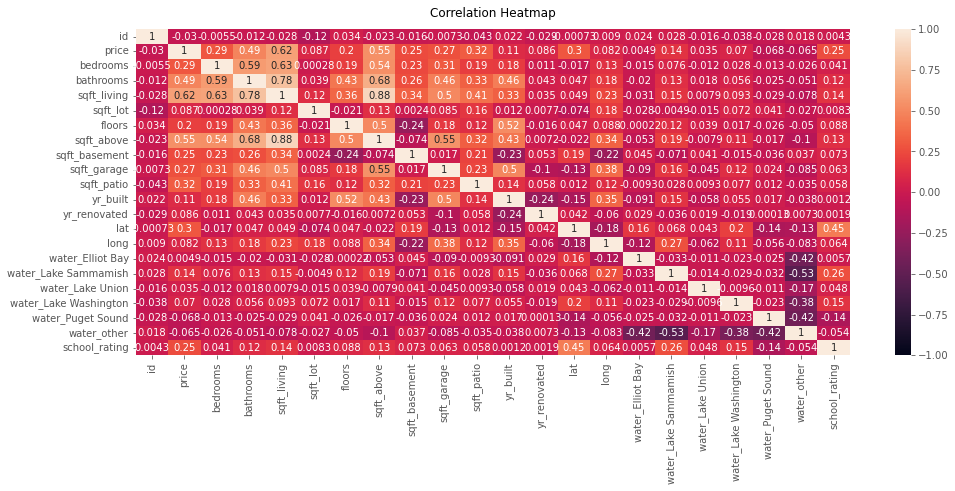

In [320]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


### Observations
- At first glance, it appears that sqft_living, sqft_above and bathrooms are the strongest correlated features to the price. 
- Further investigation is needed to measure the validity of the variables. They may be correlated with the price due to skewness or other factors that can make the correlation a deceptively "good" feature.
- To investigate further, we will monitor the Variance Inflation Factor(VIF) to address the issue of multicollinearity.

## Changing categorical variables to numerical columns - this needs to be done if we want to use them in a linear model

In [321]:
#extracting grade as an integer
df['grade'] = df['grade'].apply(lambda x: int(str(x.split(' ')[0])))

# replacing conditions with values
cond_dict = {'Poor':1,'Fair':2,'Average':3,'Good':4,'Very Good':5}
df.condition.replace(to_replace=cond_dict,inplace=True)

#changing date to datetime object, get day and month
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

df['day_of_year'] = df['date'].dt.dayofyear

## Recheck dtypes

In [322]:
df.dtypes

id                                int64
date                     datetime64[ns]
price                           float64
bedrooms                          int64
bathrooms                       float64
sqft_living                       int64
sqft_lot                          int64
floors                          float64
waterfront                       object
greenbelt                        object
nuisance                         object
view                             object
condition                         int64
grade                             int64
heat_source                      object
sewer_system                     object
sqft_above                        int64
sqft_basement                     int64
sqft_garage                       int64
sqft_patio                        int64
yr_built                          int64
yr_renovated                      int64
address                          object
lat                             float64
long                            float64


### Extracting Numerical Predictors by filtering dtypes

In [323]:
df.dtypes.unique()

array([dtype('int64'), dtype('<M8[ns]'), dtype('float64'), dtype('O'),
       dtype('uint8')], dtype=object)

In [324]:
# categorizing dtypes
numerical_types = ['int64','float64']
numerical_predictors = list(df.select_dtypes(include=numerical_types))
numerical_predictors

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'school_rating',
 'month',
 'day_of_year']

### Create dataframe of numerical values

In [325]:
# df[numerical_predictors] selects only numerical columns
df_numerical = df[numerical_predictors]

In [326]:
df_numerical.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'lat', 'long',
       'school_rating', 'month', 'day_of_year'],
      dtype='object')

In [327]:
len(df_numerical)

29200

In [328]:
len(waterfront_dummies)

29200

## Dropping price to isolate predictors

In [329]:
df_numerical = df_numerical.drop(['id','price'],axis=1)

In [330]:
df_numerical['floors'] = df['floors'].astype(float)

### Calculating variance inflation factor [VIF]

#### VIF levels:

- Good: VIF <= 5

- Moderate/Questionable: VIF >=5 and VIF <= 10

- Throw out: VIF >= 10


In [331]:
print(get_vifs(df_numerical))

         Variable            VIF
0        bedrooms      24.768622
1       bathrooms      26.263735
2     sqft_living     119.808110
3        sqft_lot       1.140594
4          floors      17.177547
5       condition      31.150197
6           grade     133.035571
7      sqft_above      92.874304
8   sqft_basement       7.075288
9     sqft_garage       4.675596
10     sqft_patio       2.240790
11       yr_built    9263.218882
12   yr_renovated       1.211647
13            lat  136585.268881
14           long  146658.438892
15  school_rating      22.635104
16          month     697.233857
17    day_of_year     612.219197
None


### It appears at first glance that the data only yields a small set of independent variables that are not highly collinear with eachother. This will be looked at again after the removal of outliers, and the transformation of data. 

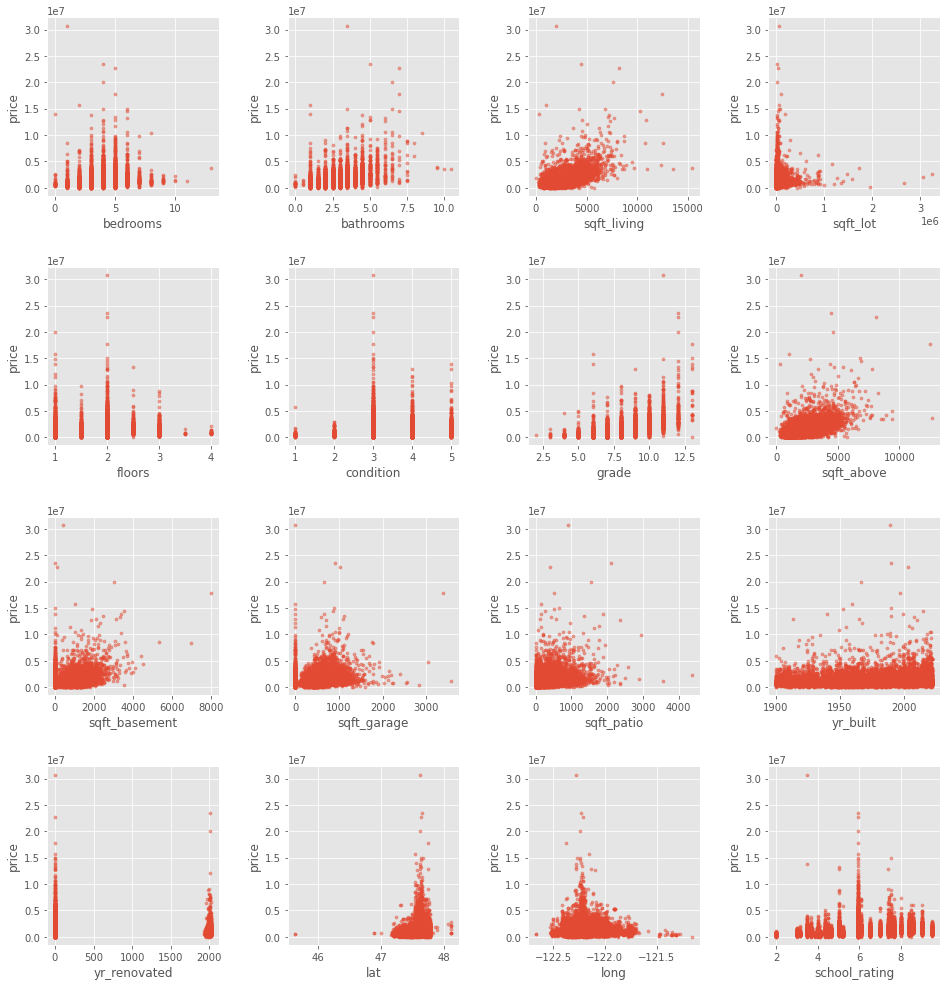

In [332]:
# Specify the dependent variable and independent variables
y_col = 'price'
x_cols = [col for col in df_numerical.columns if col != y_col][:16]  # Use the first 16 independent variables

# Create scatter plot matrix
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, x_var in enumerate(x_cols):
    row, col = divmod(i, 4)
    axs[row, col].scatter(df_numerical[x_var], df[y_col], alpha=0.5, s=10)
    axs[row, col].set_xlabel(x_var)
    axs[row, col].set_ylabel(y_col)

# Adjust plot layout
fig.subplots_adjust(top=0.93, hspace=0.4, wspace=0.4)

# Show the plot
plt.show()

### Extracting Categorical String Predictors

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     29200 non-null  int64         
 1   date                   29200 non-null  datetime64[ns]
 2   price                  29200 non-null  float64       
 3   bedrooms               29200 non-null  int64         
 4   bathrooms              29200 non-null  float64       
 5   sqft_living            29200 non-null  int64         
 6   sqft_lot               29200 non-null  int64         
 7   floors                 29200 non-null  float64       
 8   waterfront             29200 non-null  object        
 9   greenbelt              29200 non-null  object        
 10  nuisance               29200 non-null  object        
 11  view                   29200 non-null  object        
 12  condition              29200 non-null  int64         
 13  g

In [334]:
categorical_types = ['O']
categorical_predictors = list(df.select_dtypes(include=categorical_types))
categorical_predictors

['waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'heat_source',
 'sewer_system',
 'address',
 'zipcode',
 'waterfront_loc']

In [335]:
df_categorical = df[categorical_predictors]

In [336]:
df_categorical

,waterfront,greenbelt,nuisance,view,heat_source,sewer_system,address,zipcode,waterfront_loc
0,NO,NO,NO,NONE,Gas,PUBLIC,"2102 southeast 21st court, renton, washington ...",98055,other
1,NO,NO,YES,AVERAGE,Oil,PUBLIC,"11231 greenwood avenue north, seattle, washing...",98133,other
2,NO,NO,NO,AVERAGE,Gas,PUBLIC,"8504 south 113th street, seattle, washington 9...",98178,other
3,NO,NO,NO,AVERAGE,Gas,PUBLIC,"4079 letitia avenue south, seattle, washington...",98118,other
4,NO,NO,YES,NONE,Electricity,PUBLIC,"2193 northwest talus drive, issaquah, washingt...",98027,other
...,...,...,...,...,...,...,...,...,...
30150,NO,NO,NO,NONE,Oil,PUBLIC,"4673 eastern avenue north, seattle, washington...",98103,other
30151,NO,NO,NO,FAIR,Gas,PUBLIC,"4131 44th avenue southwest, seattle, washingto...",98116,other
30152,NO,NO,YES,NONE,Gas,PUBLIC,"910 martin luther king jr way, seattle, washin...",98122,other
30153,NO,NO,NO,NONE,Gas,PUBLIC,"17127 114th avenue southeast, renton, washingt...",98055,other


# Model #1

In [337]:
model_data = df_numerical

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1720.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:11:04   Log-Likelihood:            -4.3106e+05
No. Observations:               29200   AIC:                         8.622e+05
Df Residuals:                   29181   BIC:                         8.623e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -6.06e+07      4e+06    -15.154

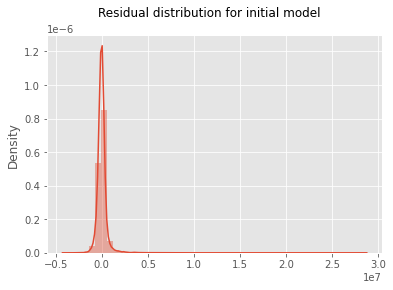

(None,
 Text(0.5, 0.98, 'Residual distribution for initial model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [338]:
get_OLS_model('initial',X = model_data, y = df['price'])

## Getting RMSE(Root Mean Squared Error), MAE(Mean Absolute Error), and MAPE(Mean Absolute Percentage Error)

In [339]:
get_error_metrics(model_data,df['price'])

Root Mean Squared Error: 623699.3991379869
Mean Absolute Error: 319830.223730651
Mean Squared Error: 389000940485.0875
Mean Absolute Percentage Error: 38.5537919134284 %


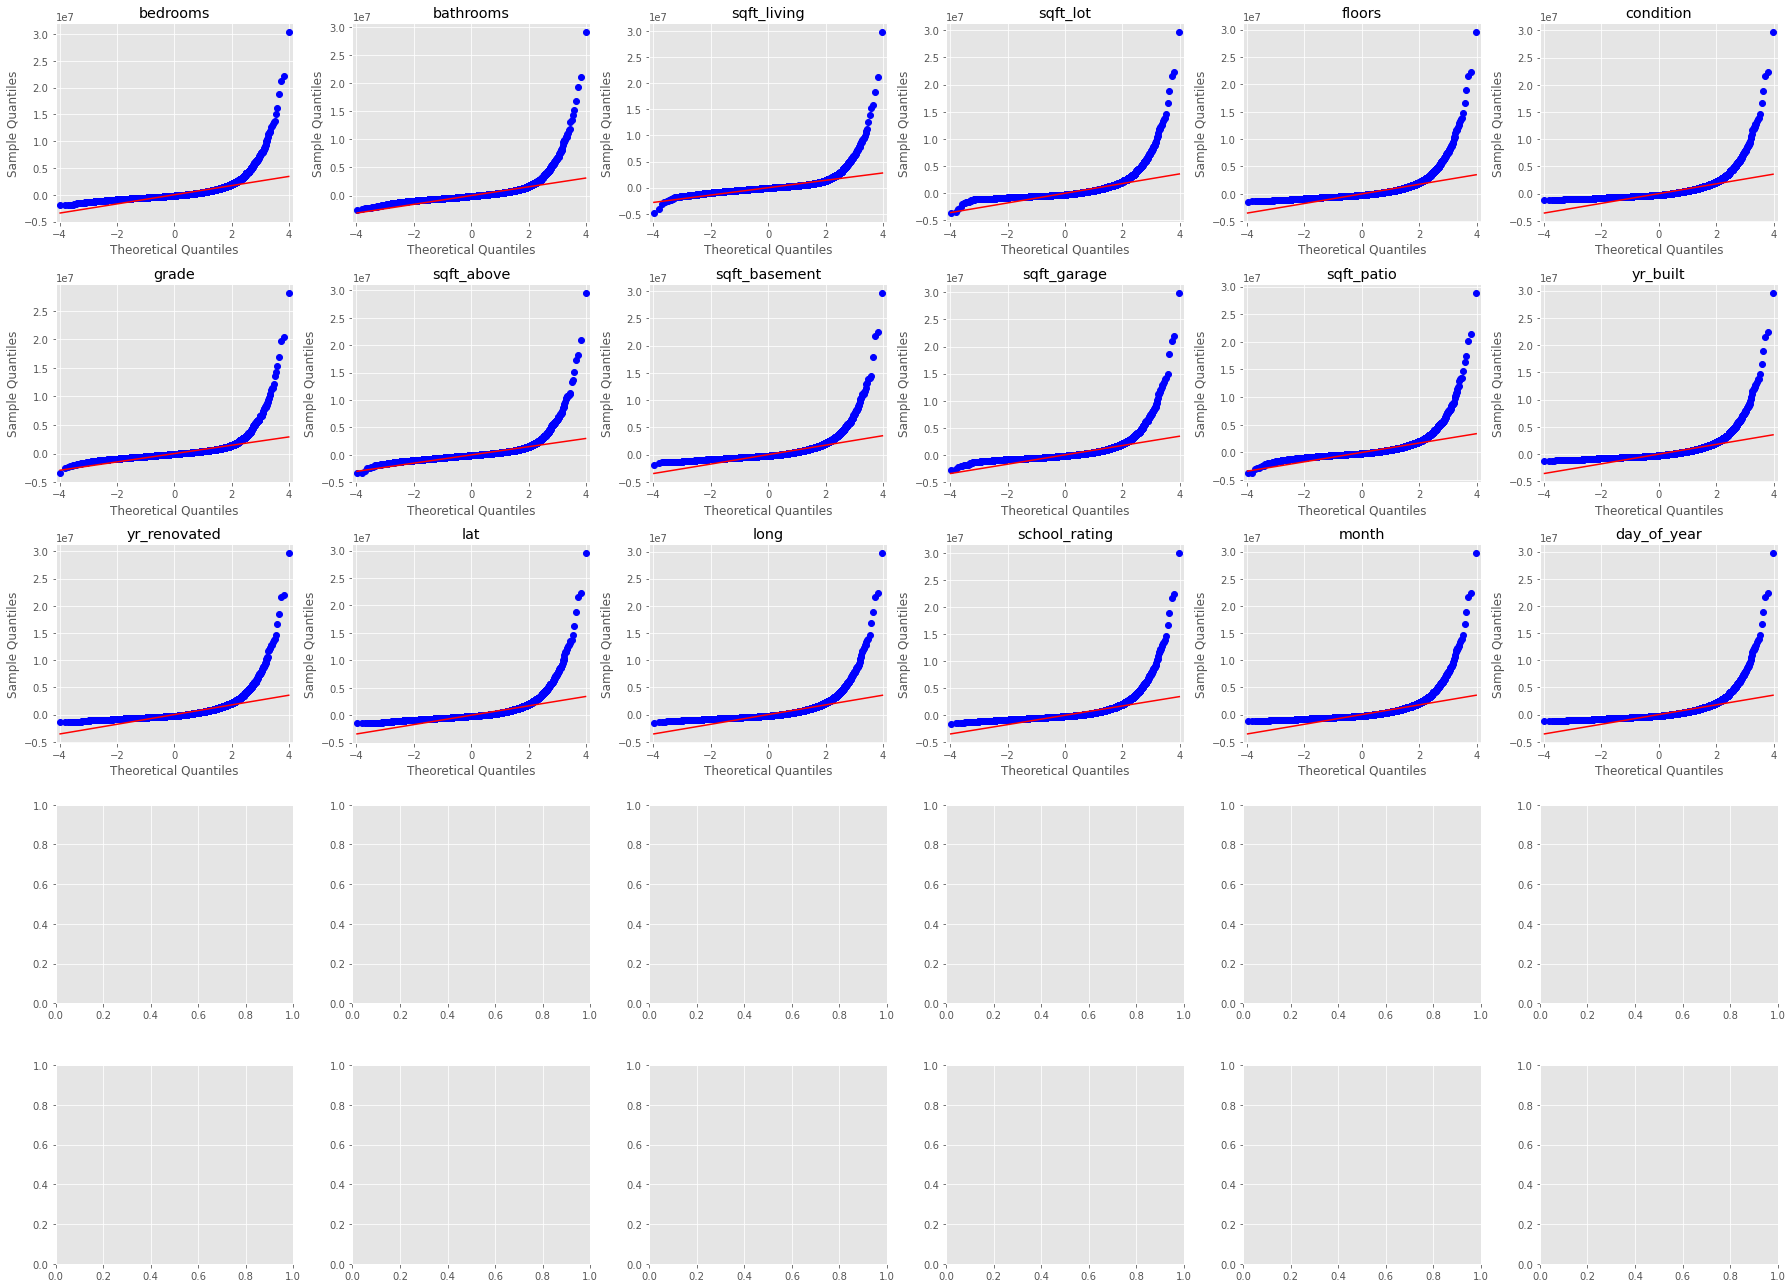

In [340]:
get_model_qqplots(model_data, df['price'])

# Observations

p_value > 0.05

- `longitude`**
- `month`

 - month was not anticipated as an effective predictor because it is not typical for the season to affect the sale price of a house
 
 Additional Observations:
 - The adjusted r-squared value is .514, indicating that his model can explain approximately 51.4% of the data.
 -  Skew: A kurtosis value between -2 and +2 is good to prove normalcy. The skew score is 10.065, indicating that this model is heavily skewed. This will be addressed through transformations to normalize the data. 

## Possible Improvements to be made to model:
    - dropping of variables that are not statistically significant (Pval > 0.05)
    - addition of categorial variables(one hot encoded)
    - location would possibly be the most interesting variable, mapped against the waterfront or view variable
    - transformation of data to satisfy normality assumption -ex: log transformation or square root transformation
    - removal of outliers: Outliers in this case will be considered to be any data falling greater than 
      3 standard deviations outside the mean
### Goals
    - improve skewness - removal of outliers, transform data
    - improve on homoscedasticity
    - increase rsquared to promote higher level explanation of data from model
    - remove collinearity - all VIFs less than a value of 5. 

# Categorical data Exploratory Analysis and Engineering

The goal of this section will be to add in meaningful categorical data to the model, to be OneHotEncoded once prepped. For this, we first look at the categorical data. 

In [341]:
df_categorical.columns

Index(['waterfront', 'greenbelt', 'nuisance', 'view', 'heat_source',
       'sewer_system', 'address', 'zipcode', 'waterfront_loc'],
      dtype='object')

## Possible categorical variables of interest: 

* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `address` - The street address

The grade and condition are already onehotencoded in the model and could be changed to a numerical variable, so this part of the analysis will focus on the string categorical variables. 

The address appears to be the most interesting variable in the batch because it can be mapped against the waterfronts or the quality of view from the houses. For this, we will extrapolate features of the address to reduce and categorize the location. 

In [342]:
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

## Data like this will be converted to a numeric boolean, Yes as 1 and No as 0.

In [343]:
# convert waterfront into numeric boolean
waterfront_bool_dict = {'YES':1,'NO':0,np.nan:0}
df_categorical.waterfront.replace(to_replace=waterfront_bool_dict,inplace=True)

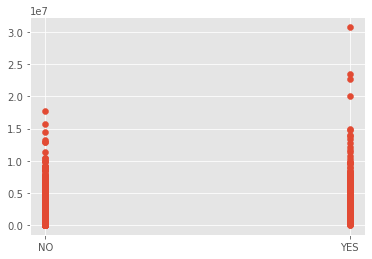

In [344]:
plt.scatter(x=df['waterfront'], y=df['price'])

In [345]:
df['nuisance'].unique()

array(['NO', 'YES'], dtype=object)

In [346]:
# convert nuisance into numeric boolean
nuisance_bool_dict = {'YES':1,'NO':0,np.nan:0}
df_categorical.nuisance.replace(to_replace=nuisance_bool_dict,inplace=True)

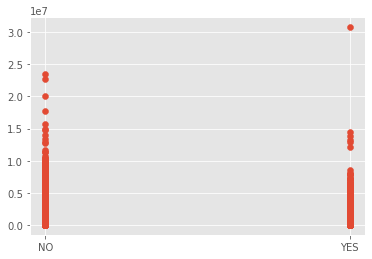

In [347]:
plt.scatter(x=df['nuisance'], y=df['price'])

In [348]:
# convert nuisance into numeric boolean
greenbelt_bool_dict = {'YES':1,'NO':0,np.nan:0}
df_categorical.greenbelt.replace(to_replace=greenbelt_bool_dict,inplace=True)

In [349]:
df['view'].unique()

array(['NONE', 'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD'], dtype=object)

In [350]:
# convert view from string into categorical ordinal
view_dict = {'NONE':0,'FAIR':1,'AVERAGE':2,'GOOD':3,'EXCELLENT':4}
df_categorical.view.replace(to_replace=view_dict,inplace=True)

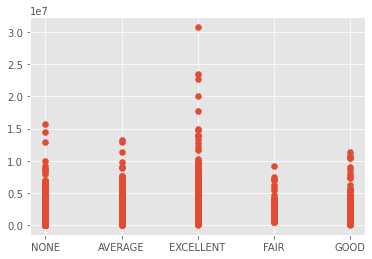

In [351]:
plt.scatter(x=df['view'], y=df['price'])

In [352]:
df['heat_source'].unique()

array(['Gas', 'Oil', 'Electricity', 'Gas/Solar', 'Electricity/Solar',
       'Other', 'Oil/Solar'], dtype=object)

In [353]:
heat_source_dummies = pd.get_dummies(df['heat_source'], prefix='heat_source',drop_first=True)
heat_source_dummies

,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
30150,0,0,0,1,0,0
30151,0,1,0,0,0,0
30152,0,1,0,0,0,0
30153,0,1,0,0,0,0


In [354]:
df['sewer_system'].unique()

array(['PUBLIC', 'PRIVATE', 'PRIVATE RESTRICTED', 'PUBLIC RESTRICTED'],
      dtype=object)

In [355]:
sewer_dummies = pd.get_dummies(df['sewer_system'],prefix='sewer', drop_first=True)
sewer_dummies

,sewer_PRIVATE RESTRICTED,sewer_PUBLIC,sewer_PUBLIC RESTRICTED
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
30150,0,1,0
30151,0,1,0
30152,0,1,0
30153,0,1,0


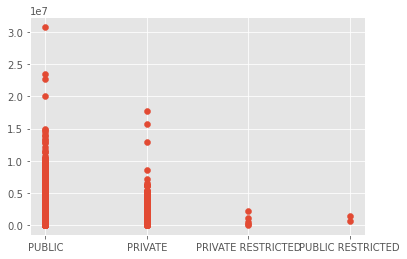

In [356]:
plt.scatter(x=df['sewer_system'], y=df['price'])

### Developing categorical dataframe

In [357]:
df_cat_pick = df_categorical[['waterfront','nuisance','view','greenbelt']]

## Model #2

In [358]:
model_2_data = pd.concat([df_numerical,sewer_dummies,heat_source_dummies, df_cat_pick], axis = 1)

In [359]:
len(model_2_data) == len(waterfront_dummies)

True

In [360]:
model_2_data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'lat', 'long',
       'school_rating', 'month', 'day_of_year', 'sewer_PRIVATE RESTRICTED',
       'sewer_PUBLIC', 'sewer_PUBLIC RESTRICTED',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'waterfront', 'nuisance', 'view', 'greenbelt'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1177.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:11:12   Log-Likelihood:            -4.2978e+05
No. Observations:               29200   AIC:                         8.596e+05
Df Residuals:                   29168   BIC:                         8.599e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

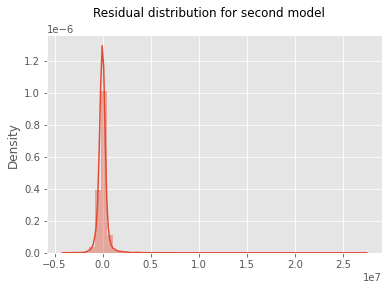

(None,
 Text(0.5, 0.98, 'Residual distribution for second model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [361]:
get_OLS_model('second',model_2_data, df['price'])

In [362]:
get_error_metrics(model_2_data,df['price'])

Root Mean Squared Error: 596902.0952097847
Mean Absolute Error: 313192.77802855265
Mean Squared Error: 356292111265.8311
Mean Absolute Percentage Error: 38.42188326354516 %


`heat_source`, `greenbelt` and `sewer_system` both have incredibly high p-values. These will be dropped from the final model if it holds. 

## Observations of Model 2

Model is still highly skewed although did present itself with some improvements. Next steps will be to normalize the data by transforming features that are skewed within the data, as well as remove outliers

- Durbin Watson score is in the acceptable range of 1.50-2.50
- Rsquared has 'improved' but only at the expense of the the continued flaws mentioned before. 

## Eliminating Outliers

To normalize the distribution, outlier removal will be the first step. An outlier will be defined as three standard deviations away from the mean of the target variable.

In [363]:
# Get the 3rd and 97th percentiles of the dependent variable column
lower_percentile = df['price'].quantile(0.03)
upper_percentile = df['price'].quantile(0.97)

# Filter the DataFrame to exclude values outside the lower and upper percentiles
df_outlier_removed = df[(df['price'] > lower_percentile) & 
                 (df['price'] < upper_percentile)]

# Create a new DataFrame with only the dependent variable column
y = df_outlier_removed['price']

# Filter the model_2_data to exclude values outside the lower and upper percentiles
model_2_data_outlier_removed = model_2_data[(df['price'] > lower_percentile) &  (df['price'] < upper_percentile)]

In [364]:
df_outlier_removed

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,waterfront_loc,water_Elliot Bay,water_Lake Sammamish,water_Lake Union,water_Lake Washington,water_Puget Sound,water_other,school_rating,month,day_of_year
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,other,0,0,0,0,0,1,5.937719,5,144
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,other,0,0,0,0,0,1,6.500000,12,347
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,other,0,0,0,0,0,1,4.000000,12,348
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,other,0,0,0,0,0,1,5.937719,8,236
5,2807100156,2021-07-20,625000.0,2,1.0,1190,5688,1.0,NO,NO,...,other,0,0,0,0,0,1,6.500000,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,other,0,0,0,0,0,1,6.500000,11,334
30151,194000695,2021-06-16,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,other,0,0,0,0,0,1,7.666667,6,167
30152,7960100080,2022-05-27,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,other,0,0,0,0,0,1,3.500000,5,147
30153,2781280080,2022-02-24,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,other,0,0,0,0,0,1,5.937719,2,55


In [365]:
waterfront_dummies = df_outlier_removed[['water_Elliot Bay','water_Lake Sammamish', 'water_Lake Washington','water_Puget Sound','water_other']]

In [366]:
df_outlier_removed.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'zipcode', 'waterfront_loc',
       'water_Elliot Bay', 'water_Lake Sammamish', 'water_Lake Union',
       'water_Lake Washington', 'water_Puget Sound', 'water_other',
       'school_rating', 'month', 'day_of_year'],
      dtype='object')

## New look at model with removed outliers

In [367]:
len(y)

27446

In [368]:
outlier_data = pd.concat([y,model_2_data_outlier_removed], axis=1)

In [369]:
outlier_data = outlier_data.drop('price', axis=1)

In [370]:
len(outlier_data)

27446

In [371]:
outlier_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_garage,...,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,waterfront,nuisance,view,greenbelt
0,4,1.0,1180,7140,1.0,4,7,1180,0,0,...,0,1,0,0,0,0,0,0,0,0
1,5,2.5,2770,6703,1.0,3,7,1570,1570,0,...,0,0,0,1,0,0,0,1,2,0
3,3,3.0,2160,1400,2.0,3,9,1090,1070,200,...,0,1,0,0,0,0,0,0,2,0
4,2,2.0,1120,758,2.0,3,7,1120,550,550,...,0,0,0,0,0,0,0,1,0,0
5,2,1.0,1190,5688,1.0,3,7,1190,0,300,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,5,2.0,1910,4000,1.5,4,8,1600,1130,0,...,0,0,0,1,0,0,0,0,0,0
30151,3,2.0,2020,5800,2.0,3,7,2020,0,0,...,0,1,0,0,0,0,0,0,1,0
30152,3,2.0,1620,3600,1.0,3,7,940,920,240,...,0,1,0,0,0,0,0,1,0,0
30153,3,2.5,2570,2889,2.0,3,8,1830,740,480,...,0,1,0,0,0,0,0,0,0,0


## Model #3

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1663.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:11:13   Log-Likelihood:            -3.8572e+05
No. Observations:               27446   AIC:                         7.715e+05
Df Residuals:                   27414   BIC:                         7.718e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

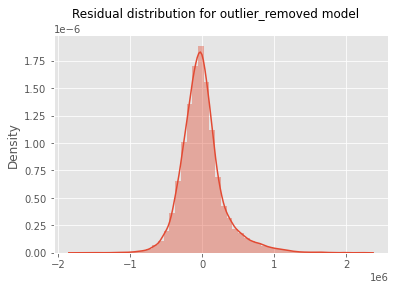

(None,
 Text(0.5, 0.98, 'Residual distribution for outlier_removed model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [372]:
get_OLS_model('outlier_removed', outlier_data,y)

## Looking at RMSE, MAE, MAPE

In [373]:
get_error_metrics(outlier_data,y)

Root Mean Squared Error: 307124.630764551
Mean Absolute Error: 216648.7300344102
Mean Squared Error: 94325538822.26172
Mean Absolute Percentage Error: 22.378040560715522 %


In [374]:
outlier_data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'lat', 'long',
       'school_rating', 'month', 'day_of_year', 'sewer_PRIVATE RESTRICTED',
       'sewer_PUBLIC', 'sewer_PUBLIC RESTRICTED',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'waterfront', 'nuisance', 'view', 'greenbelt'],
      dtype='object')

## Observations of model 3
pvalue > 0.05
- `sqft_basement` 
- `sqft_garage`
- `sewer_PRIVATE RESTRICTED`
- `sewer_PUBLIC RESTRICTED`
- `heat_source_Electricity/Solar`
- `heat_source_Oil/Solar`
- `heat_source_Other`



- Adjusted rsquared indicates that the model explains 62.2% of the data.
- Skewness has improved dramatically to an acceptable range between -2 and 2. The removal of outliers has made this possible.
- Durbin-Watson score is still in the acceptable ranges of 1.5-2.5
- Jarque-Bera score is still very high but has been brought down by a significant factor. Still not perfect but trending in the right direction.
- Multicollinearity is possibly present in the model and likely so given the initial VIFs before the first model was built. VIFS should be revisited again to see if those variables are worth keeping. 

## Looking at transformations for the price.

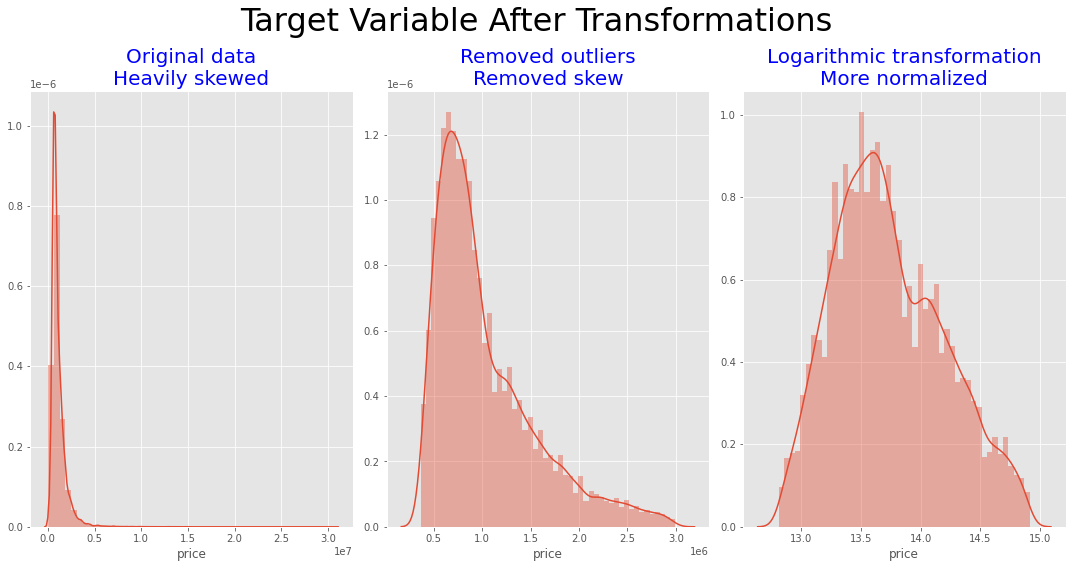

In [375]:
def plot_dist(ax, data, title):
    sns.distplot(data, ax=ax)
    ax.set_title(title, fontsize=20, color='b')
    ax.set_ylabel("")

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))

# Plot the original data
plot_dist(ax1, df['price'], "Original data\nHeavily skewed")


# Plot the data with outliers removed
plot_dist(ax2, y, "Removed outliers\nRemoved skew")

# Apply square root transformation to the data
y_log = np.log(y)

# Plot the transformed data
plot_dist(ax3, y_log, "Logarithmic transformation\nMore normalized")

# Set the overall title of the figure
fig.suptitle("Target Variable After Transformations", fontsize=32)

# Adjust the layout of the subplots
fig.tight_layout()

# Show the figure
plt.show()


### Checking model with transformed target variable - log transformation

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2083.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:11:15   Log-Likelihood:                -915.24
No. Observations:               27446   AIC:                             1894.
Df Residuals:                   27414   BIC:                             2158.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

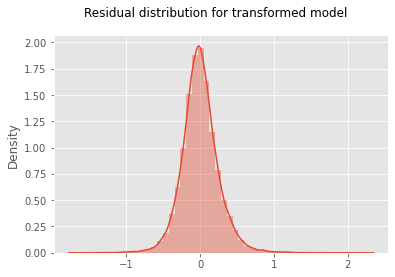

(None,
 Text(0.5, 0.98, 'Residual distribution for transformed model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [376]:
get_OLS_model('transformed', outlier_data, y_log)

In [377]:
get_error_metrics(outlier_data, y)

Root Mean Squared Error: 307124.630764551
Mean Absolute Error: 216648.7300344102
Mean Squared Error: 94325538822.26172
Mean Absolute Percentage Error: 22.378040560715522 %


## Checking distribution of predictor

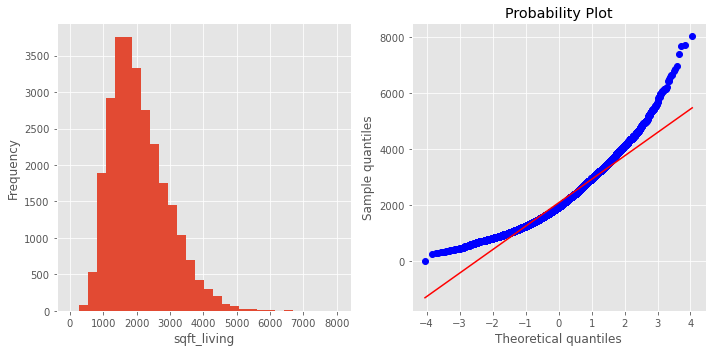

In [378]:
plot_hist_qq(outlier_data, 'sqft_living')

Data is clearly skewed right and follows an exponential pattern similar to price. For this, we will use a logarithmic transformation.

In [379]:
outlier_data['sqft_garage']

0          0
1          0
3        200
4        550
5        300
        ... 
30150      0
30151      0
30152    240
30153    480
30154    420
Name: sqft_garage, Length: 27446, dtype: int64

In [380]:
outlier_data['sqft_living_log'] = np.log(outlier_data['sqft_living']) 

In [381]:
outlier_data['sqft_above_log'] = np.log(outlier_data['sqft_above']) 
outlier_data['sqft_basement_log'] = np.log(outlier_data['sqft_basement']) 

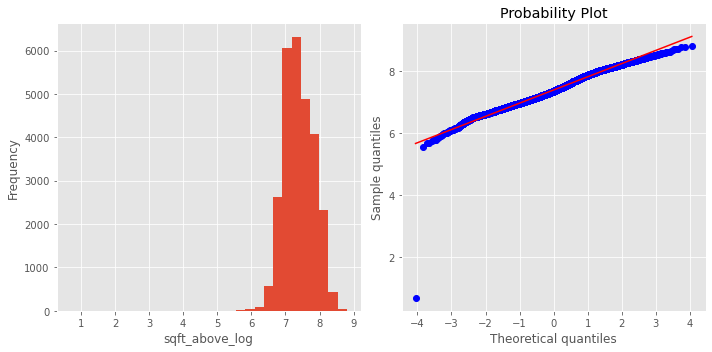

In [382]:
plot_hist_qq(outlier_data, 'sqft_above_log')

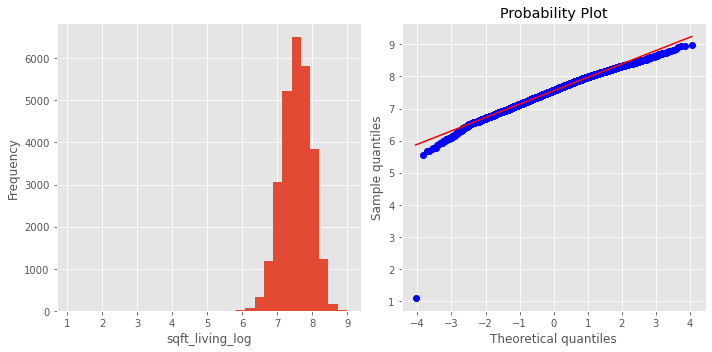

In [383]:
plot_hist_qq(outlier_data, 'sqft_living_log')

In [384]:
outlier_data = outlier_data.drop('sqft_living', axis=1)

In [385]:
outlier_data = outlier_data.drop(['sqft_basement_log','sqft_above'], axis=1)

In [386]:
outlier_data

,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_basement,sqft_garage,sqft_patio,yr_built,...,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,waterfront,nuisance,view,greenbelt,sqft_living_log,sqft_above_log
0,4,1.0,7140,1.0,4,7,0,0,40,1969,...,0,0,0,0,0,0,0,0,7.073270,7.073270
1,5,2.5,6703,1.0,3,7,1570,0,240,1950,...,0,1,0,0,0,1,2,0,7.926603,7.358831
3,3,3.0,1400,2.0,3,9,1070,200,270,2010,...,0,0,0,0,0,0,2,0,7.677864,6.993933
4,2,2.0,758,2.0,3,7,550,550,30,2012,...,0,0,0,0,0,1,0,0,7.021084,7.021084
5,2,1.0,5688,1.0,3,7,0,300,0,1948,...,0,0,0,0,0,1,0,0,7.081709,7.081709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,5,2.0,4000,1.5,4,8,1130,0,210,1921,...,0,1,0,0,0,0,0,0,7.554859,7.377759
30151,3,2.0,5800,2.0,3,7,0,0,520,2011,...,0,0,0,0,0,0,1,0,7.610853,7.610853
30152,3,2.0,3600,1.0,3,7,920,240,110,1995,...,0,0,0,0,0,1,0,0,7.390181,6.845880
30153,3,2.5,2889,2.0,3,8,740,480,100,2006,...,0,0,0,0,0,0,0,0,7.851661,7.512071


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2030.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:11:17   Log-Likelihood:                -1163.8
No. Observations:               27446   AIC:                             2392.
Df Residuals:                   27414   BIC:                             2655.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

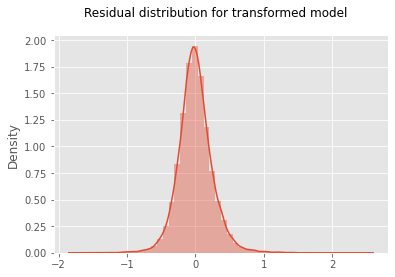

(None,
 Text(0.5, 0.98, 'Residual distribution for transformed model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [387]:
get_OLS_model('transformed', outlier_data, y_log)

In [388]:
get_error_metrics(outlier_data, np.log(y))

Root Mean Squared Error: 0.2524520019146538
Mean Absolute Error: 0.18615763578646563
Mean Squared Error: 0.06373201327071651
Mean Absolute Percentage Error: 1.349776109363379 %


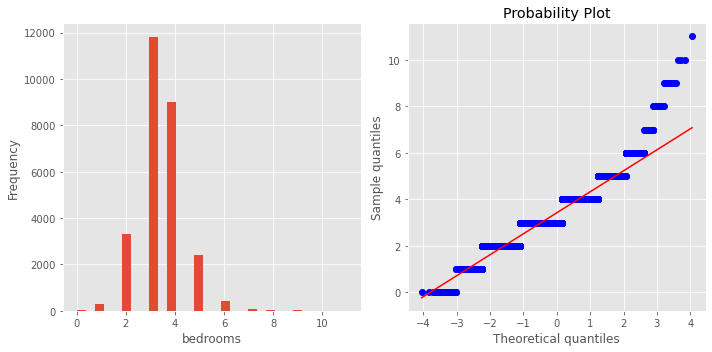

In [389]:
plot_hist_qq(outlier_data, 'bedrooms')

pval > 0.05

- `bedrooms` - will be dropped from the current model


In [390]:
outlier_data = outlier_data.drop(['bedrooms'], axis=1)

#### Rerun model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2098.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:11:19   Log-Likelihood:                -1163.9
No. Observations:               27446   AIC:                             2390.
Df Residuals:                   27415   BIC:                             2645.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

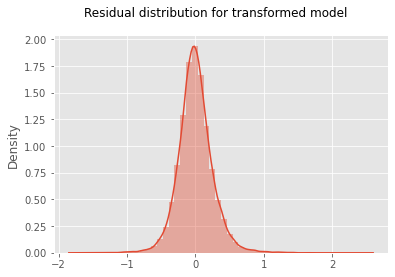

(None,
 Text(0.5, 0.98, 'Residual distribution for transformed model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [391]:
get_OLS_model('transformed', outlier_data, y_log)

### Dropping sewer/heat source data

In [392]:
new_outlier_data = outlier_data.drop(['sewer_PRIVATE RESTRICTED','sewer_PUBLIC RESTRICTED', 'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other', 'heat_source_Electricity/Solar'], axis =1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2621.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:11:19   Log-Likelihood:                -1171.0
No. Observations:               27446   AIC:                             2392.
Df Residuals:                   27421   BIC:                             2598.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -15.32

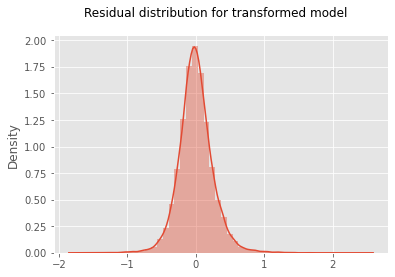

(None,
 Text(0.5, 0.98, 'Residual distribution for transformed model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [393]:
get_OLS_model('transformed', new_outlier_data, y_log)

In [394]:
get_error_metrics(outlier_data, np.log(y))

Root Mean Squared Error: 0.2524522320662653
Mean Absolute Error: 0.1861562179348615
Mean Squared Error: 0.0637321294752396
Mean Absolute Percentage Error: 1.3497665754437247 %


## Observations

- pval > 0.05

`bedrooms` - dropped from the current model

- all variables are statistically significant (pvalue < 0.05)
- Durbin-Watson Score continues to be "fine" but not improve a whole lot.
- Jarque-Bera Score continues to improve but still must come down
- skewness is now an afterthought as its at a very low -0.347
Overall no real improvement of the model happens here, we will try adding in new variables to improve as well as revisit VIFs to likely drop all that were originally at extremely high levels. 


Next steps to improve the model:
1. revisit VIFs to see if any variables(now that outliers are removed and data has been transformed) should now be dropped from the model. 
2. New predictors will be engineered to be added to the model. The next focus will be on the zipcodes in an attempt to narrow down the data with location-dependent price points. Possible data to be looked at are:
- waterfronts 
- views
- school districts: rating, and school taxes
- tax brackets



Jarque-Beras score and skew level continue to improve but there is still some work to do. 

## Rechecking VIFs

In [395]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your data into a pandas DataFrame
data = new_outlier_data

# Get a list of the column names
cols = data.columns

# Create an empty DataFrame to hold the VIF results
vif_data = pd.DataFrame()

# Loop through each column and calculate the VIF
for i in range(len(cols)):
    vif = variance_inflation_factor(data[cols].values, i)
    vif_data = vif_data.append({'Variable': cols[i], 'VIF': vif}, ignore_index=True)

# Print the VIF results
print(vif_data)

                 Variable            VIF
0               bathrooms      24.580409
1                sqft_lot       1.272715
2                  floors      17.906228
3               condition      31.744844
4                   grade     136.046636
5           sqft_basement       5.548325
6             sqft_garage       4.716769
7              sqft_patio       2.268667
8                yr_built    9442.803293
9            yr_renovated       1.206515
10                    lat  137051.004970
11                   long  149009.707184
12          school_rating      22.583453
13                  month     698.069896
14            day_of_year     613.004100
15           sewer_PUBLIC       8.905953
16        heat_source_Gas       3.950232
17  heat_source_Gas/Solar       1.015877
18             waterfront       1.203282
19               nuisance       1.266023
20                   view       1.445507
21              greenbelt       1.063737
22        sqft_living_log    4042.168986
23         sqft_

## Scaling data

In [396]:
scaledX = (new_outlier_data - np.mean(new_outlier_data)) / np.std(new_outlier_data)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2621.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:11:23   Log-Likelihood:                -1171.0
No. Observations:               27446   AIC:                             2392.
Df Residuals:                   27421   BIC:                             2598.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    13.73

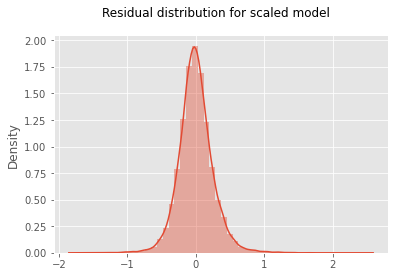

(None,
 Text(0.5, 0.98, 'Residual distribution for scaled model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [397]:
get_OLS_model('scaled',scaledX, y_log)

In [398]:
get_vifs(scaledX)

                 Variable         VIF
0               bathrooms    2.811641
1                sqft_lot    1.185793
2                  floors    2.162107
3               condition    1.264240
4                   grade    2.651151
5           sqft_basement    3.294506
6             sqft_garage    1.955133
7              sqft_patio    1.260990
8                yr_built    2.745679
9            yr_renovated    1.157626
10                    lat    1.478937
11                   long    1.612849
12          school_rating    1.315751
13                  month  116.899921
14            day_of_year  116.891973
15           sewer_PUBLIC    1.407379
16        heat_source_Gas    1.234088
17  heat_source_Gas/Solar    1.012807
18             waterfront    1.188773
19               nuisance    1.055278
20                   view    1.300271
21              greenbelt    1.046766
22        sqft_living_log   12.423755
23         sqft_above_log   11.518974


### Adding waterfront dummies to the model

In [399]:
water_data = pd.concat([scaledX,waterfront_dummies], axis=1)

In [400]:
water_data.columns

Index(['bathrooms', 'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long', 'school_rating', 'month', 'day_of_year',
       'sewer_PUBLIC', 'heat_source_Gas', 'heat_source_Gas/Solar',
       'waterfront', 'nuisance', 'view', 'greenbelt', 'sqft_living_log',
       'sqft_above_log', 'water_Elliot Bay', 'water_Lake Sammamish',
       'water_Lake Washington', 'water_Puget Sound', 'water_other'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2216.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:11:26   Log-Likelihood:                -963.31
No. Observations:               27446   AIC:                             1987.
Df Residuals:                   27416   BIC:                             2233.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    13.74

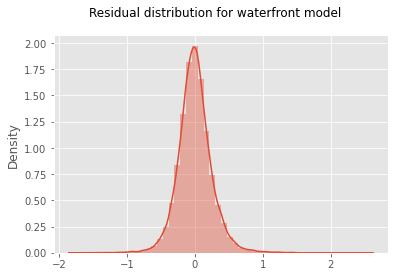

(None,
 Text(0.5, 0.98, 'Residual distribution for waterfront model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [401]:
get_OLS_model('waterfront',water_data,y_log)

Elliot Bay and Puget Sound present high pvalues indicating a lack of statistical significance. These will be dropped from the model. 

In [402]:
water_data = water_data.drop(['water_other'], axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2295.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:11:26   Log-Likelihood:                -963.74
No. Observations:               27446   AIC:                             1985.
Df Residuals:                   27417   BIC:                             2224.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    13.73

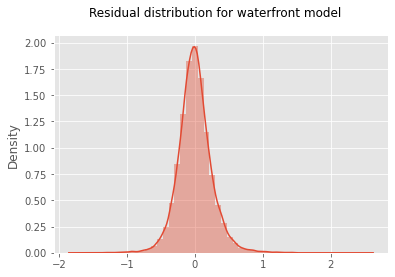

(None,
 Text(0.5, 0.98, 'Residual distribution for waterfront model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [403]:
get_OLS_model('waterfront',water_data,y_log)

## Recheck VIFs

In [404]:
get_vifs(water_data)

                 Variable         VIF
0               bathrooms    2.813340
1                sqft_lot    1.189452
2                  floors    2.164729
3               condition    1.265659
4                   grade    2.684640
5           sqft_basement    3.303409
6             sqft_garage    1.966661
7              sqft_patio    1.262438
8                yr_built    2.759136
9            yr_renovated    1.158497
10                    lat    1.598631
11                   long    1.715710
12          school_rating    1.391829
13                  month  116.915147
14            day_of_year  116.906698
15           sewer_PUBLIC    1.499272
16        heat_source_Gas    1.236037
17  heat_source_Gas/Solar    1.013081
18             waterfront    1.193616
19               nuisance    1.056813
20                   view    1.302727
21              greenbelt    1.047238
22        sqft_living_log   12.430358
23         sqft_above_log   11.525881
24       water_Elliot Bay    1.046071
25   water_L

#### Month and day_of_year present with high variance inflation factors indicating possible collinearity. These will be dropped. 

In [405]:
water_data = water_data.drop(['month','day_of_year','sqft_living_log'], axis =1)

In [406]:
get_vifs(water_data)

                 Variable       VIF
0               bathrooms  2.577034
1                sqft_lot  1.189274
2                  floors  2.106364
3               condition  1.245395
4                   grade  2.650525
5           sqft_basement  1.739446
6             sqft_garage  1.931209
7              sqft_patio  1.260968
8                yr_built  2.727856
9            yr_renovated  1.157031
10                    lat  1.598304
11                   long  1.714505
12          school_rating  1.391487
13           sewer_PUBLIC  1.499179
14        heat_source_Gas  1.232148
15  heat_source_Gas/Solar  1.013055
16             waterfront  1.193558
17               nuisance  1.056450
18                   view  1.302571
19              greenbelt  1.047180
20         sqft_above_log  3.204486
21       water_Elliot Bay  1.045897
22   water_Lake Sammamish  1.190638
23  water_Lake Washington  1.164236
24      water_Puget Sound  1.055993


All VIFs are now below 3 aside from sqft_above, meaning the issue of collinearity is now for the most part solved. 

## Final model

In [407]:
y_log

0        13.422468
1        13.732129
3        13.560618
4        13.292106
5        13.345507
           ...    
30150    14.256986
30151    14.087825
30152    13.592367
30153    13.560618
30154    13.122363
Name: price, Length: 27446, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2436.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:11:37   Log-Likelihood:                -1478.7
No. Observations:               27446   AIC:                             3009.
Df Residuals:                   27420   BIC:                             3223.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    13.73

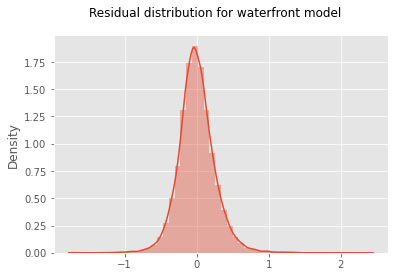

(None,
 Text(0.5, 0.98, 'Residual distribution for waterfront model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [408]:
get_OLS_model('waterfront',water_data,y_log)

In [409]:
water_data.columns

Index(['bathrooms', 'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long', 'school_rating', 'sewer_PUBLIC',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'waterfront', 'nuisance',
       'view', 'greenbelt', 'sqft_above_log', 'water_Elliot Bay',
       'water_Lake Sammamish', 'water_Lake Washington', 'water_Puget Sound'],
      dtype='object')

In [410]:
model = sm.OLS(y_log, sm.add_constant(water_data))
results = model.fit()
model_residual = results.resid
model_params = results.params

print(results.params)

const                    13.736729
bathrooms                 0.047068
sqft_lot                  0.028813
floors                   -0.011327
condition                 0.037022
grade                     0.139444
sqft_basement             0.041031
sqft_garage              -0.005816
sqft_patio                0.015882
yr_built                 -0.056476
yr_renovated              0.012371
lat                       0.185338
long                      0.027619
school_rating             0.051876
sewer_PUBLIC              0.014033
heat_source_Gas           0.015022
heat_source_Gas/Solar     0.007290
waterfront                0.017373
nuisance                 -0.009398
view                      0.044831
greenbelt                 0.012760
sqft_above_log            0.137180
water_Elliot Bay         -0.061135
water_Lake Sammamish      0.119907
water_Lake Washington    -0.136576
water_Puget Sound        -0.027451
dtype: float64


## Sorting the 'params' in order of highest correlations, negative or positive.

In [411]:
params = pd.DataFrame(results.params)
params = params.reset_index()
params.columns = ['variable', 'coefficient']
params['correlation'] = params['coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x<0 else x) 
params['coefficient'] = params['coefficient'].apply(lambda x: abs(x))
params = params.sort_values('coefficient', ascending=False)
params

,variable,coefficient,correlation
0,const,13.736729,Positive
11,lat,0.185338,Positive
5,grade,0.139444,Positive
21,sqft_above_log,0.137180,Positive
24,water_Lake Washington,0.136576,Negative
23,water_Lake Sammamish,0.119907,Positive
22,water_Elliot Bay,0.061135,Negative
9,yr_built,0.056476,Negative
13,school_rating,0.051876,Positive
1,bathrooms,0.047068,Positive


In [417]:
for i, row in params.iterrows():
    if i == 0:
        pass
    elif row.correlation =='Positive':
        print(f'As {params.variable[i]} increases by 1 standard deviation, the price of a home increases by {round(params.coefficient[i]*100, 2)}%\n')
    else:
        print(f'As {params.variable[i]} increases by 1 standard deviation, the price of a home decreases by {round(params.coefficient[i]*100, 2)}%\n')


As lat increases by 1 standard deviation, the price of a home increases by 18.53%

As grade increases by 1 standard deviation, the price of a home increases by 13.94%

As sqft_above_log increases by 1 standard deviation, the price of a home increases by 13.72%

As water_Lake Washington increases by 1 standard deviation, the price of a home decreases by 13.66%

As water_Lake Sammamish increases by 1 standard deviation, the price of a home increases by 11.99%

As water_Elliot Bay increases by 1 standard deviation, the price of a home decreases by 6.11%

As yr_built increases by 1 standard deviation, the price of a home decreases by 5.65%

As school_rating increases by 1 standard deviation, the price of a home increases by 5.19%

As bathrooms increases by 1 standard deviation, the price of a home increases by 4.71%

As view increases by 1 standard deviation, the price of a home increases by 4.48%

As sqft_basement increases by 1 standard deviation, the price of a home increases by 4.1%

A

## Final Observations

In the model we see that the most positively correlated variables with the price are the Latitude, Grade, Square Foot aside from the basement, as well as proximity near Lake Sammamish. 

## Getting final model error metrics

In [423]:
get_error_metrics(water_data, y_log)

Root Mean Squared Error: 0.25536528768972633
Mean Absolute Error: 0.18961016638812606
Mean Squared Error: 0.06521143015685647
Mean Absolute Percentage Error: 1.374804908681138 %


In [424]:
print(get_log_mse(water_data,y_log))

0.000297421717360086


In [421]:
get_log_mse(water_data,y_log)

0.000297421717360086

In [414]:
y.mean()

1031631.3646797348

In [415]:
y.max() - y.min()

2622000.0

In [416]:
len(water_data)

27446